This project aims to identify the optimal number of clusters in the famous Iris dataset using the K-Means clustering algorithm. The Iris dataset consists of 150 samples of iris flowers with four features: sepal length, sepal width, petal length, and petal width. By applying the K-Means clustering algorithm, we can group similar data points together. The Elbow method is used to determine the optimal number of clusters, and the results are visualized for better understanding.

1. Libraries Import: The necessary libraries for data manipulation, clustering, and visualization are imported.
2. Data Loading: The Iris dataset is loaded using load_iris() from sklearn.datasets and stored in a DataFrame.
3. Data Standardization: The features are standardized using StandardScaler for better clustering performance.
4. Elbow Method: The Within-Cluster Sum of Squares (WCSS) is calculated for different numbers of clusters (1 to 10) to find the optimal number of clusters using the Elbow method.
5. K-Means Clustering: K-Means is applied to the dataset with the determined optimal number of clusters.
6. Visualization: The clusters and their centroids are visualized using scatter plots for two features of the dataset.

**Import the appropriate libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

**Loading the Dataset**

In [2]:
# Load the dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


**Elbow method**

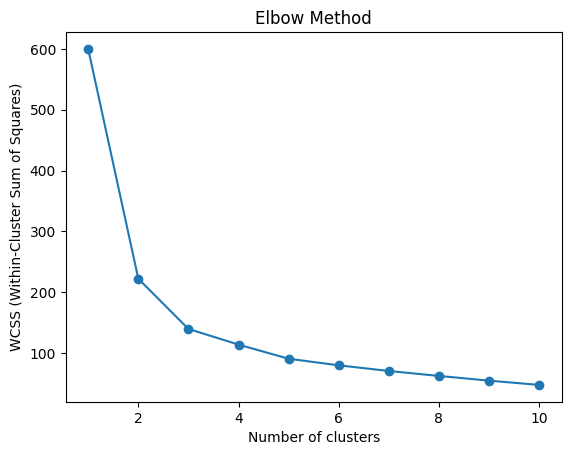

In [3]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


**Applying KMeans to the dataset with the optimal number of clusters**

In [4]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data)


**Visualizing the clusters**

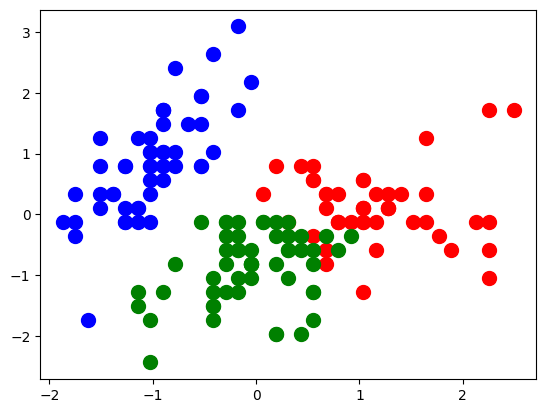

In [5]:
plt.scatter(scaled_data[clusters == 0, 0], scaled_data[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_data[clusters == 1, 0], scaled_data[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_data[clusters == 2, 0], scaled_data[clusters == 2, 1], s=100, c='green', label='Cluster 3')


**Plotting the centroids**

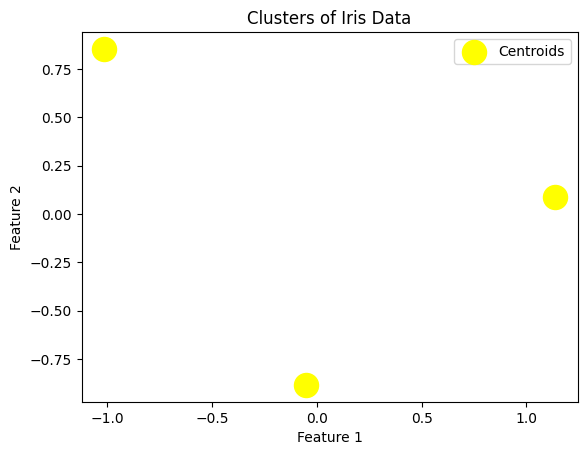

In [6]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Iris Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
